<img src="../../../figs/holberton_logo.png" alt="logo" width="500"/>


# Data Augmentation

Starting a machine learning project is exciting, but **finding enough data can be tough**. Many datasets have only a few hundred images, while big ones have tens of thousands or more.

You might worry that your neural network won't perform well with so little data. But fear not! Data augmentation can help.

First things first. Let's understand why it's crucial.

<img src="img/dataaug.png" alt="data augmentation" width="500"/>

When you train a machine learning model, what you’re really doing is tuning its parameters such that it can map a particular input (say, an image) to some output (a label). Our optimization goal is to chase that sweet spot where our model’s loss is low, which happens when your parameters are tuned in the right way.

<blockquote style="font-size:22px;">Neural networks typically have parameters in the order of millions!</blockquote>

Naturally, if you have **a lot of parameters, you would need to show your machine learning model a proportional amount of examples**, to get good performance. Also, the number of parameters you need is proportional to the complexity of the task your model has to perform.

<blockquote style="font-size:22px;">How do I get more data, if I don’t have “more data”?</blockquote>

<img src="img/decision.gif" alt="get data" width="300"/>

You don't need to hunt for novel new images that can be added to your dataset. Why? Because, neural networks aren’t smart to begin with. For instance, a poorly trained neural network would think that these three tennis balls shown below, are distinct, unique images.

<img src="img/tenis.jpeg" alt="new data" width="700"/>


So, to get more data, we just need to make minor alterations to our existing dataset. Minor changes such as flips or translations or rotations. Our neural network would think these are distinct images anyway.


<img src="img/dataaugment.png" alt="new data" width="800"/>

A convolutional neural network that can robustly classify objects even if its placed in different orientations is said to have the property called invariance. More specifically, **a CNN can be invariant to translation, viewpoint, size or illumination (Or a combination of the above)**.

This essentially is the **premise of data augmentation**. In the real world scenario, we may have a dataset of images taken in a limited set of conditions. But, our target application may exist in a variety of conditions, such as different orientation, location, scale, brightness etc. We account for these situations by training our neural network with additional synthetically modified data.


## Getting Started

Before we dive into the various augmentation techniques, there’s one issue that we must consider beforehand.

### Where do we augment data in our ML pipeline?

The answer may seem quite obvious; **we do augmentation before we feed the data to the model** right? Yes, but you have two options here. 

- One option is to perform all the necessary transformations beforehand, essentially increasing the size of your dataset. 
- The other option is to perform these transformations on a mini-batch, just before feeding it to your machine learning model.

The first option is known as **offline augmentation**. This method is preferred for relatively smaller datasets, as you would end up increasing the size of the dataset by a factor equal to the number of transformations you perform (For example, by flipping all my images, I would increase the size of my dataset by a factor of 2).

The second option is known as **online augmentation**, or augmentation on the fly. This method is preferred for larger datasets, as you can’t afford the explosive increase in size. Instead, you would perform transformations on the mini-batches that you would feed to your model. Some machine learning frameworks have support for online augmentation, which can be accelerated on the GPU.


### Most common data augmentation techniques

#### Flip
This technique involves horizontally or vertically flipping images. Horizontal flipping reflects the image around the y-axis, while vertical flipping reflects it around the x-axis. It helps in increasing the diversity of the dataset and making models more robust to different orientations of objects.

#### Rotation
Rotation involves rotating images by a certain angle, typically in degrees. This technique is used to simulate variations in object orientation within images. By rotating images, models can learn to recognize objects from different perspectives, thus improving generalization.

#### Scale
Scaling modifies the size of an image by stretching or shrinking it along its dimensions. It helps simulate variations in the size of objects in the scene. By training on scaled images, models become more tolerant to variations in object size and better generalize to objects of different scales.

#### Crop
Cropping involves removing parts of the image, usually from the edges, to focus on specific regions of interest. It helps in training models to focus on important features while ignoring irrelevant background information. Cropping also introduces variations in object location within the image.

#### Translation
Translation shifts the image along its x and y axes, effectively moving objects within the image. This technique is used to simulate variations in object position and helps models learn to recognize objects regardless of their location within the image.

#### Hue
Hue adjustment involves changing the color hue of the image, typically by shifting the hue values of pixels. It helps in simulating changes in lighting conditions and variations in color appearance. By training on images with adjusted hues, models become more robust to changes in lighting and color variations in real-world scenarios

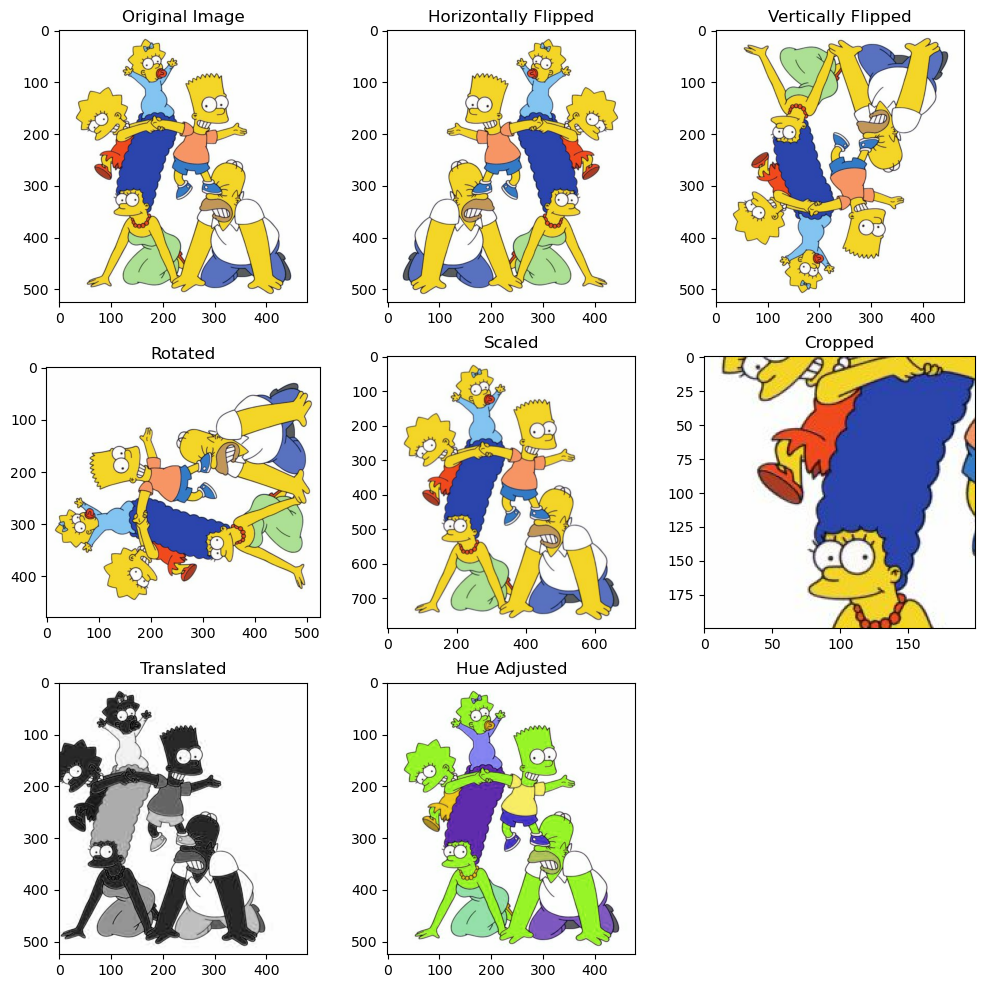

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import apply_affine_transform

# Load the image
image_path = "img/simpsons.jpg"
image = tf.io.read_file(image_path)
image = tf.image.decode_png(image, channels=3)  

# Define data augmentation operations

# 1. FLIP
flip_horizontally = tf.image.flip_left_right(image)
flip_vertically = tf.image.flip_up_down(image)

# 2. ROTATE
rotate = tf.image.rot90(image)

# 3. SCALE
scale = tf.image.resize(image, [int(image.shape[0] * 1.5), int(image.shape[1] * 1.5)])  # Scale by 1.5 times

# 4. CROP
crop = tf.image.random_crop(image, size=[200, 200, 3])  # Crop to 200x200 pixels

# 5. TRANSLATE
translate = apply_affine_transform(image.numpy(), tx=50, ty=50)  # Translate by 50 pixels in x and y directions

# 6. HUE
hue = tf.image.adjust_hue(image, delta=0.1)  # Increase hue by 0.1

# Plot the original and augmented images
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(image.numpy().astype("uint8"))

plt.subplot(3, 3, 2)
plt.title("Horizontally Flipped")
plt.imshow(flip_horizontally.numpy().astype("uint8"))

plt.subplot(3, 3, 3)
plt.title("Vertically Flipped")
plt.imshow(flip_vertically.numpy().astype("uint8"))

plt.subplot(3, 3, 4)
plt.title("Rotated")
plt.imshow(rotate.numpy().astype("uint8"))

plt.subplot(3, 3, 5)
plt.title("Scaled")
plt.imshow(scale.numpy().astype("uint8"))

plt.subplot(3, 3, 6)
plt.title("Cropped")
plt.imshow(crop.numpy().astype("uint8"))

plt.subplot(3, 3, 7)
plt.title("Translated")
plt.imshow(translate.astype("uint8"))

plt.subplot(3, 3, 8)
plt.title("Hue Adjusted")
plt.imshow(hue.numpy().astype("uint8"))

plt.show()


## Project Tasks

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(0)

# Load the Stanford Dogs dataset
doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)


### 0. Flip

Write a function `def flip_image(image)`: that flips an image horizontally:

- image is a `3D tf.Tensor` containing the image to flip
- Returns the flipped image

In [15]:
import tensorflow as tf


def flip_image(image):
    """
    Flips an image horizontally
    """
    return tf.image.flip_up_down(image)

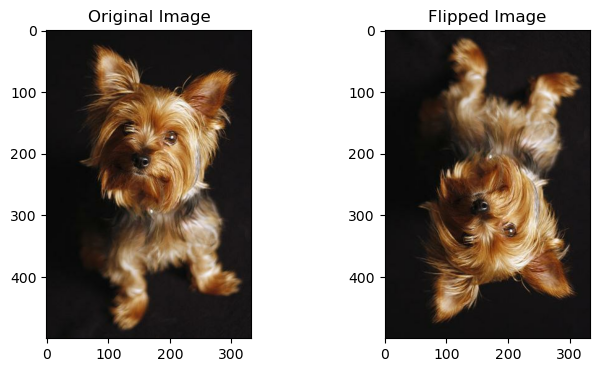

In [19]:
# Shuffle and take one example from the dataset
for image, _ in doggies.shuffle(10).take(1):
    flipped_image = flip_image(image)
    
    # Plot the original and flipped images
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.numpy().astype("uint8"))
    
    plt.subplot(1, 2, 2)
    plt.title("Flipped Image")
    plt.imshow(flipped_image.numpy().astype("uint8"))
    
    plt.show()


### 1. Crop

Write a function `def crop_image(image, size)`: that performs a random crop of an image:

- image is a `3D tf.Tensor` containing the image to crop
- `size` is a tuple containing the size of the crop
- Returns the cropped image

In [20]:
def crop_image(image, size):
    """
    Performs a random crop of an image
    """
    return tf.image.random_crop(image, size=size)

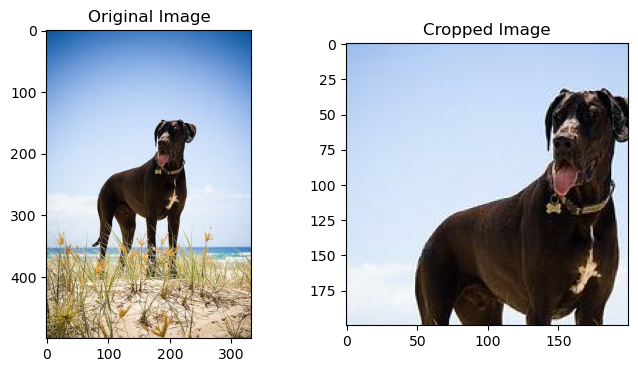

In [23]:
crop_size = (200, 200, 3)

# Shuffle and take one example from the dataset
for image, _ in doggies.shuffle(10).take(1):
    cropped_image = crop_image(image, crop_size)
    
    # Plot the original and cropped images
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.numpy().astype("uint8"))
    
    plt.subplot(1, 2, 2)
    plt.title("Cropped Image")
    plt.imshow(cropped_image.numpy().astype("uint8"))
    
    plt.show()

### 2. Rotate

Write a function `def rotate_image(image)`: that rotates an image by 90 degrees counter-clockwise:

- image is a `3D tf.Tensor` containing the image to rotate
- Returns the rotated image

In [29]:
def rotate_image(image):
    """
    Rotates an image 90 degrees counter-clockwise
    """
    return tf.image.rot90(image, k=3)


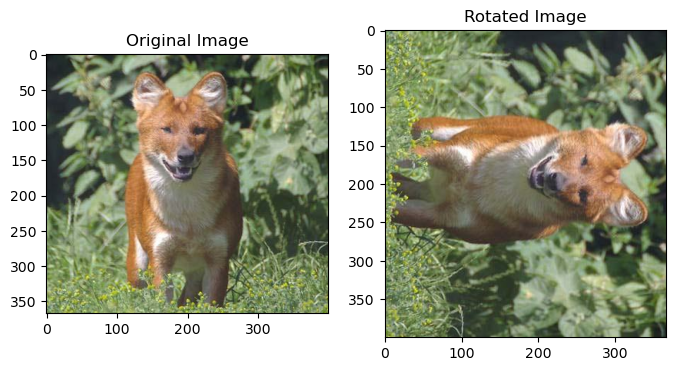

In [31]:
# Shuffle and take one example from the dataset
for image, _ in doggies.shuffle(10).take(1):
    rotated_image = rotate_image(image)
    
    # Plot the original and rotated images
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.numpy().astype("uint8"))
    
    plt.subplot(1, 2, 2)
    plt.title("Rotated Image")
    plt.imshow(rotated_image.numpy().astype("uint8"))
    
    plt.show()

### 3. Shear

Write a function `def shear_image(image, intensity)`: that randomly shears an image:

- `image` is a `3D tf.Tensor` containing the image to shear
- `intensity` is the intensity with which the image should be sheared
- Returns the sheared image

In [32]:
def shear_image(image, intensity):
    """
    Shears an image
    """
    image_nparray = tf.keras.preprocessing.image.img_to_array(image)
    shear_nparray = tf.keras.preprocessing.image.random_shear(image_nparray,
                                                              intensity)
    image_result = tf.keras.preprocessing.image.array_to_img(shear_nparray)
    return image_result

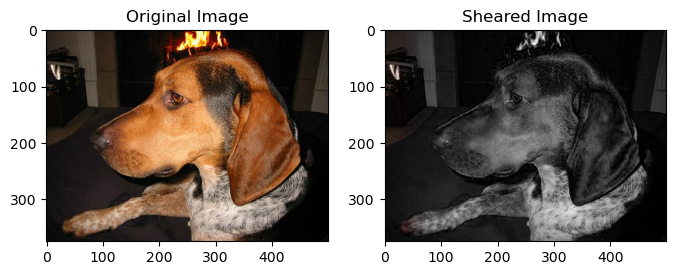

In [35]:
shear_intensity = 2.5

# Shuffle and take one example from the dataset
for image, _ in doggies.shuffle(10).take(1):
    sheared_image = shear_image(image, shear_intensity)
    
    # Plot the original and sheared images
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.numpy().astype("uint8"))
    
    plt.subplot(1, 2, 2)
    plt.title("Sheared Image")
    plt.imshow(sheared_image)
    
    plt.show()

### 4. Brightness

Write a function `def change_brightness(image, max_delta)`: that randomly changes the brightness of an image:

- `image` is a `3D tf.Tensor` containing the image to change
- `max_delta` is the maximum amount the image should be brightened (or darkened)
- Returns the altered image

In [36]:
def change_brightness(image, max_delta):
    """
    Randomly changes the brightness of an image
    """
    return tf.image.random_brightness(image, max_delta)

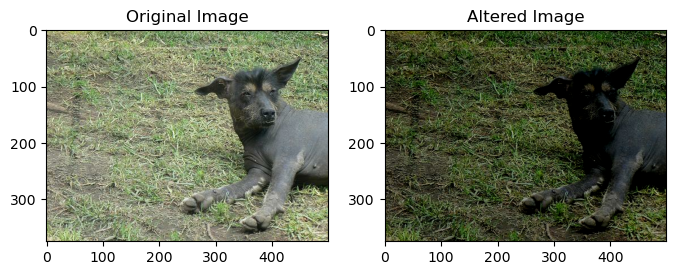

In [42]:
# Define the maximum delta for brightness change
max_delta = 0.7

# Shuffle and take one example from the dataset
for image, _ in doggies.shuffle(10).take(1):
    altered_image = change_brightness(image, max_delta)
    
    # Plot the original and altered images
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.numpy().astype("uint8"))
    
    plt.subplot(1, 2, 2)
    plt.title("Altered Image")
    plt.imshow(altered_image.numpy().astype("uint8"))
    
    plt.show()

### 5. Hue

Write a function `def change_hue(image, delta)`: that changes the hue of an image:

- `image` is a `3D tf.Tensor` containing the image to change
- `delta` is the amount the hue should change
- Returns the altered image

In [43]:

def change_hue(image, delta):
    """
    Changes the hue of an image
    """
    return tf.image.adjust_hue(image, delta)

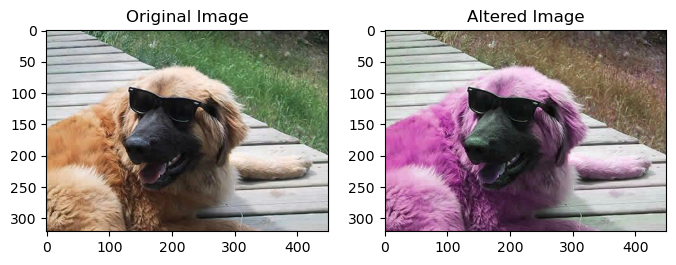

In [47]:
# Define the delta for hue change
hue_delta = 0.8

# Shuffle and take one example from the dataset
for image, _ in doggies.shuffle(10).take(1):
    altered_image = change_hue(image, hue_delta)
    
    # Plot the original and altered images
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.numpy().astype("uint8"))
    
    plt.subplot(1, 2, 2)
    plt.title("Altered Image")
    plt.imshow(altered_image.numpy().astype("uint8"))
    
    plt.show()

### Happy coding